#### To effectively implement an isolation forest model for anomaly detection, data cleaning is crucial to remove inaccuracies and irrelevant information. Indicative features should be selected for anomaly detection, and data should be split into training and testing sets for model preparation. Feature scaling is necessary for uniform data measurement to accurately isolate anomalies. Model performance evaluation is done using metrics like Precision, recall, and F1-score after training on cleaned data. This process ensures the robustness and effectiveness of the isolation forest model in identifying outliers in the dataset, providing a sense of security in its use.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 88302 to 73828
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id.orig_p                 50000 non-null  int64  
 1   id.resp_p                 50000 non-null  int64  
 2   flow_duration             50000 non-null  float64
 3   fwd_pkts_tot              50000 non-null  int64  
 4   bwd_pkts_tot              50000 non-null  int64  
 5   fwd_data_pkts_tot         50000 non-null  int64  
 6   bwd_data_pkts_tot         50000 non-null  int64  
 7   fwd_pkts_per_sec          50000 non-null  float64
 8   bwd_pkts_per_sec          50000 non-null  float64
 9   flow_pkts_per_sec         50000 non-null  float64
 10  down_up_ratio             50000 non-null  float64
 11  fwd_header_size_tot       50000 non-null  int64  
 12  fwd_header_size_min       50000 non-null  int64  
 13  fwd_header_size_max       50000 non-null  int64  
 14  bw

C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.46      0.20      2349
           1       0.22      0.05      0.07      7651

    accuracy                           0.14     10000
   macro avg       0.17      0.25      0.14     10000
weighted avg       0.20      0.14      0.11     10000



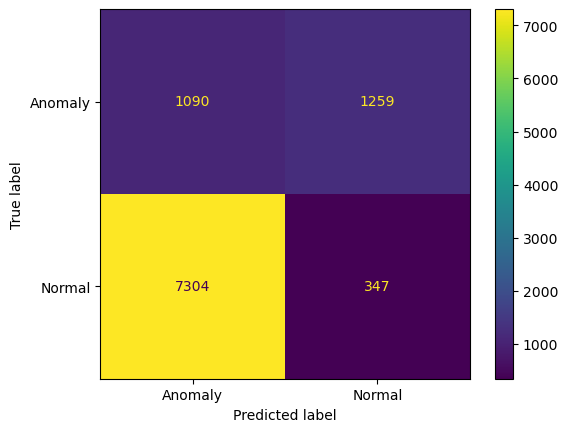

In [4]:

def anomaly_detection_isolation_forest():
    # Load the dataset
    data1 = pd.read_csv('rt_test.csv')
    
    data = data1.sample(n=50000, random_state=5)
    
    data = data.drop(['proto','service','Attack_type'], axis=1)
    data.dropna(axis=0, inplace=True)

    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        
#     data.info()
    
    # Preprocessing
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    
    X = data.drop('payload_bytes_per_second', axis=1)  # Assuming 'label' is your target column
    y_cont = data['payload_bytes_per_second']

    # First, binarize `y` based on a chosen threshold.
    y = np.where(y_cont > 1000, 1, 0)  # Define `threshold` based on the dataset

    # Select top k features; you might adjust k based on your dataset
    selector = SelectKBest(f_classif, k=15)
    X_selected = selector.fit_transform(X, y)
    
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and fit the Isolation Forest
    iso_forest = IsolationForest(contamination='auto', n_estimators=100, random_state=42)
    iso_forest.fit(X_train_scaled)
    
    # Predict on the test data
    y_pred = iso_forest.predict(X_test_scaled)
    # Convert predictions to match the original label (1 for normal, -1 for anomaly)
    y_pred = np.where(y_pred == 1, 0, 1)
    
    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Use a confusion matrix for visualization of the outcome
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()


anomaly_detection_isolation_forest()